In [1]:
#All the libraries that we will use for data transformation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Import raw data so as not to modify it
raw_df = pd.read_csv("assets/train.csv")

In [3]:
#View raw data info
raw_df.info()
raw_df.describe()
raw_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13765201 entries, 0 to 13765200
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   minutes_past           int64  
 2   radardist_km           float64
 3   Ref                    float64
 4   Ref_5x5_10th           float64
 5   Ref_5x5_50th           float64
 6   Ref_5x5_90th           float64
 7   RefComposite           float64
 8   RefComposite_5x5_10th  float64
 9   RefComposite_5x5_50th  float64
 10  RefComposite_5x5_90th  float64
 11  RhoHV                  float64
 12  RhoHV_5x5_10th         float64
 13  RhoHV_5x5_50th         float64
 14  RhoHV_5x5_90th         float64
 15  Zdr                    float64
 16  Zdr_5x5_10th           float64
 17  Zdr_5x5_50th           float64
 18  Zdr_5x5_90th           float64
 19  Kdp                    float64
 20  Kdp_5x5_10th           float64
 21  Kdp_5x5_50th           float64
 22  Kdp_5x5_90th    

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


In [4]:
# Data Transform
transformed_df = raw_df.groupby('Id').mean()
transformed_df = transformed_df.fillna(0)

In [5]:
#View transformed data and stats
transformed_df.describe()
transformed_df['Expected'].describe()
transformed_df.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,25.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10.0,0.000,0.000000,0.000,8.500000,0.000000,0.000000,0.000000,8.500000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,32.230769,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
5,28.714286,13.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440


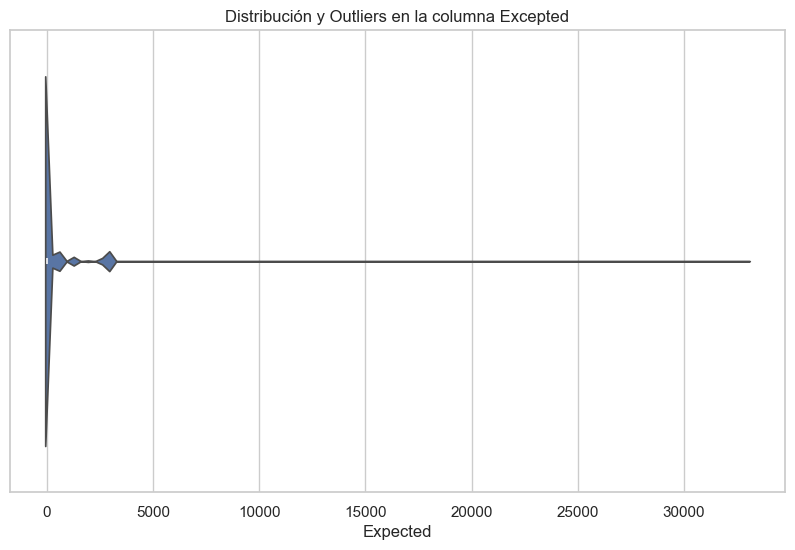

In [6]:
#Violinplot to check outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_df['Expected'])
plt.title('Distribución y Outliers en la columna Excepted')
plt.xlabel('Expected')
plt.show()

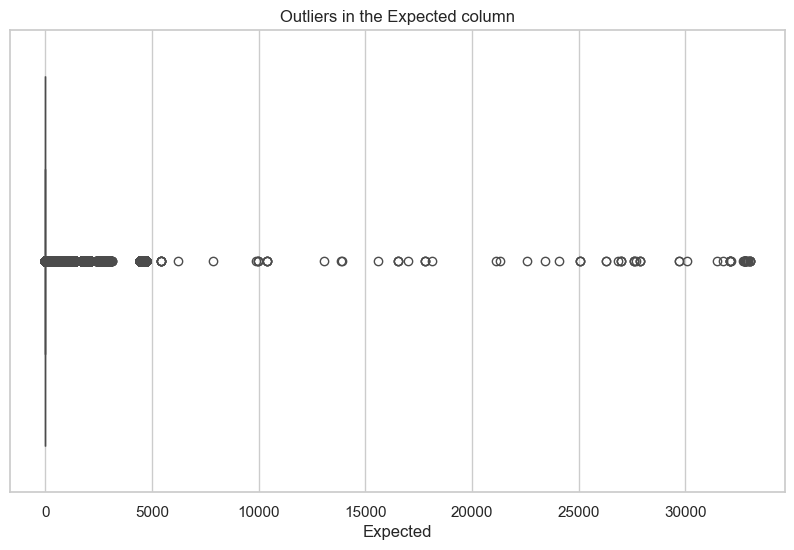

In [7]:
#Boxplot to see outliers distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_df['Expected'])
plt.title('Outliers in the Expected column')
plt.xlabel('Expected')
plt.show()
#transformed_df.info()

In [8]:
#Create a lower limit and an upper limit with the standard deviation, we consider outlier numbers outside 3 standard deviations.
mean = transformed_df['Expected'].mean()
std = transformed_df['Expected'].std()
num_std_dev = 3
lower_bound = mean - num_std_dev * std
upper_bound = mean + num_std_dev * std
cleaned_df = transformed_df[(transformed_df['Expected'] >= lower_bound) & (transformed_df['Expected'] <= upper_bound)]
print("Number of records after eliminating outliers:", len(cleaned_df))

Number of records after eliminating outliers: 1143831


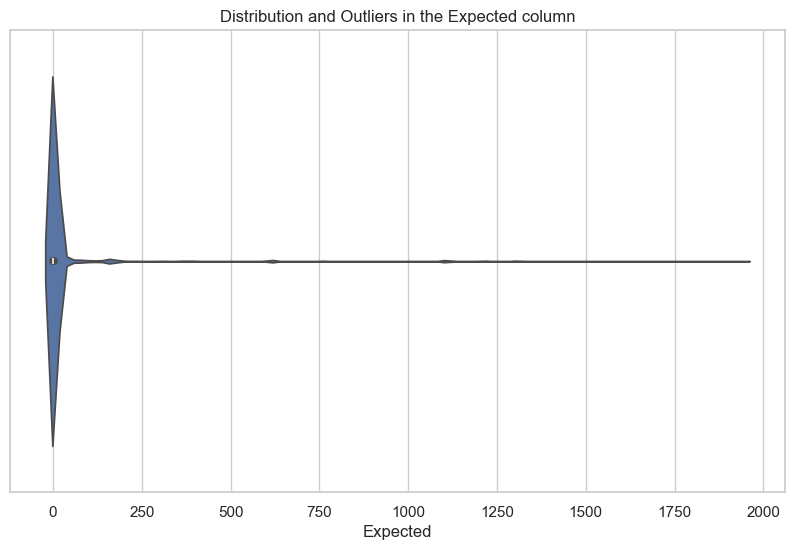

<class 'pandas.core.frame.DataFrame'>
Index: 1143831 entries, 1 to 1180945
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   minutes_past           1143831 non-null  float64
 1   radardist_km           1143831 non-null  float64
 2   Ref                    1143831 non-null  float64
 3   Ref_5x5_10th           1143831 non-null  float64
 4   Ref_5x5_50th           1143831 non-null  float64
 5   Ref_5x5_90th           1143831 non-null  float64
 6   RefComposite           1143831 non-null  float64
 7   RefComposite_5x5_10th  1143831 non-null  float64
 8   RefComposite_5x5_50th  1143831 non-null  float64
 9   RefComposite_5x5_90th  1143831 non-null  float64
 10  RhoHV                  1143831 non-null  float64
 11  RhoHV_5x5_10th         1143831 non-null  float64
 12  RhoHV_5x5_50th         1143831 non-null  float64
 13  RhoHV_5x5_90th         1143831 non-null  float64
 14  Zdr                    

In [9]:
#Violinplot without outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=cleaned_df['Expected'])
plt.title('Distribution and Outliers in the Expected column')
plt.xlabel('Expected')
plt.show()
cleaned_df.info()

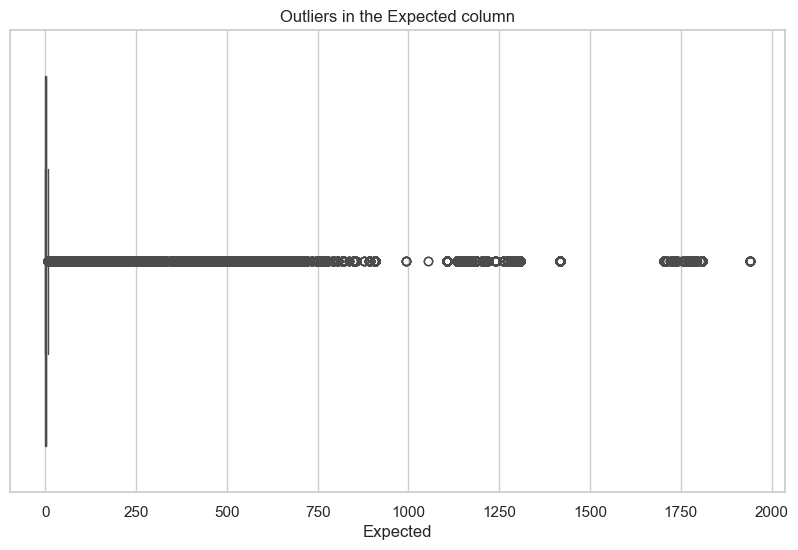

In [10]:
#Boxplot without outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_df['Expected'])
plt.title('Outliers in the Expected column')
plt.xlabel('Expected')
plt.show()

In [11]:
cleaned_df.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,25.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10.0,0.000,0.000000,0.000,8.500000,0.000000,0.000000,0.000000,8.500000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,32.230769,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
5,28.714286,13.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440


In [12]:
cleaned_df.to_csv('assets/cleaned_train.csv')